In [421]:
import re
import random
import requests
import time
import json
import tqdm

from abc import ABC, abstractmethod

from bs4 import BeautifulSoup

import pandas as pd


## Draft

In [ ]:
url = 'https://httpbin.org/user-agent'
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
headers = {'User-Agent': user_agent}
response = requests.get(url,headers=headers)
html = response.content
print(response.content)

In [8]:
user_agent = 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_9_3) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/35.0.1916.47 Safari/537.36'
headers = {'User-Agent': user_agent}


In [24]:
fss_link = "https://is.fssprus.ru/ajax_search?callback=jQuery34000259320136783735_1582702900157&system=ip&is[extended]=1&nocache=1&is[variant]=1&is[region_id][0]=77&is[last_name]=Набатчиков&is[first_name]=Константин&is[drtr_name]=&is[ip_number]=&is[patronymic]=Александрович&is[date]=17.01.1997&is[address]=&is[id_number]=&is[id_type][0]=&is[id_issuer]=&_=1582702900158"
sud_link = "https://sudrf.ru/index.php?id=300&page=0&act=go_sp_search&searchtype=sp&court_subj=77&suds_subj=&num_d=&f_name=Набатчиков Константин Александрович&date_num_in=&date_num_out=&suds_vid=&spkatg=&suds_pip=&st_cat=&sud_pip=&"


In [12]:
%%time
a = requests.get(sud_link, verify=False, headers=headers)


/Users/konstantinnabatcikov/Documents/AutoDrive/Notebooks/venv/lib/python3.8/site-packages/urllib3/connectionpool.py:997: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


CPU times: user 11.8 ms, sys: 6.08 ms, total: 17.9 ms
Wall time: 2.5 s


In [22]:
soup = BeautifulSoup(a.content)

In [23]:
soup

<div align="center" style="padding:40px;"><b>По вашему запросу ничего не найдено.<br/>Попробуйте уточнить условия поиска.</b></div>

In [38]:
# SSL for testing
import ssl
ctx = ssl.create_default_context()
ctx.check_hostname = False
ctx.verify_mode = ssl.CERT_NONE

In [40]:
help(ABC)

Help on class ABC in module abc:

class ABC(builtins.object)
 |  Helper class that provides a standard way to create an ABC using
 |  inheritance.
 |  
 |  Data and other attributes defined here:
 |  
 |  __abstractmethods__ = frozenset()



## Decision

In [41]:
class ExcelAbc(ABC):
    """ExcelAbc
    Абстрактный класс для
    записи и чтения данных из Excel

    Arguments:
        ABC {abc.ABCMeta} -- вспомогательный класс для создания интерфейсов
    """
    def __init__(self):
        """Init
        Инициализация класса
        """
        super().__init__()

    @abstractmethod
    def read_file(self, file_path):
        """Read file
        Считывает excel файл и приводит его в нормальный вид
        {
            'header': [..., {str}, ...],
            'data': [
                {
                    hader_item: value_item,
                    {str}: {str},
                    ...
                },
                ...
            ],
            'count': {int}
        }

        Arguments:
            file_path {str} -- путь до файла

        Returns:
            {dict} -- данные приведенные в нормалный вид
        """
        return {}

    @abstractmethod
    def write_file(self, file_path, data):
        """Write file
        Принимает данные в нормальном виде
        Записывает их в файл

        Arguments:
            file_path {str} -- путь до файла
            data {str} -- данные в нормальном виде

        Returns:
            {bool} -- статус
        """
        return False

In [215]:
# Абстрактный класс для Парсинга
class ParserAbc(ABC):
    """ParserAbc
    Абстрактный класс для парсинга данных

    Arguments:
        ABC {[type]} -- [description]
    """

    def __init__(self, link, params):
        # Open user-agent list
        with open('user_agents.json', 'r', encoding='utf8') as f:
            self.user_agents = json.load(f)
        # Add arguments
        self.link = link
        self.set_params(params)
        super().__init__()

    def set_params(self, params):
        self._params = params

    def get_random_user_agent(self):
        """Get random_user_agent
        Получить случайный user-agent

        Returns:
            {str} -- user-agent
        """
        return random.choice(self.user_agents)

    def make_query(self, *, params={}, verify=False):
        """Make query
        Делаем запрос к сайту

        Keyword Arguments:
            params {dict} -- get параметры (default: {{}})
            verify {bool} -- аргумент в requests (default: {False})

        Returns:
            {requests.models.Response} -- объект с результатом запроса
        """
        return requests.get(
            self.link,
            headers={'User-Agent': self.get_random_user_agent()},
            params=params,
            verify=verify
        )

    def verify_response(self, res):
        """Verify response
        Проверяет резальтат на валидность

        Arguments:
            {requests.models.Response} -- объект с результатом запроса

        Returns:
            {bool} -- Статус
        """
        return True if res.status_code == 200 else False

    @abstractmethod
    def normalize_html(self, html_data):
        """Normalize html
        На вход принимает html, арсит с него искомые данные
        и приводит их к нормальному виду
        {
            'header': [..., {str}, ...],
            'data': [
                {
                    hader_item: value_item,
                    {str}: {str},
                    ...
                },
                ...
            ],
            'count': {int}
        }

        Arguments:
            html_data {requests.models.Response} -- Res

        Returns:
            {dict} -- словарь с данными
        """
        return {}

    def pipeline_one(self, params):
        # Конвейер
        if self.verify_response(curr:=self.make_query(params=params)):  # noqa
            return self.normalize_html(curr)
        return None

In [84]:
fss_link

'https://is.fssprus.ru/ajax_search?callback=jQuery34000259320136783735_1582702900157&system=ip&is[extended]=1&nocache=1&is[variant]=1&is[region_id][0]=77&is[last_name]=Набатчиков&is[first_name]=Константин&is[drtr_name]=&is[ip_number]=&is[patronymic]=Александрович&is[date]=17.01.1997&is[address]=&is[id_number]=&is[id_type][0]=&is[id_issuer]=&_=1582702900158'

In [85]:
"https://is.fssprus.ru/ajax_search?callback=jQuery34009249386478271078_1582708986749&system=ip&is%5Bextended%5D=1&nocache=1&is%5Bvariant%5D=1&is%5Bregion_id%5D%5B0%5D=77&is%5Blast_name%5D=%D0%9D%D0%B0%D0%B1%D0%B0%D1%82%D1%87%D0%B8%D0%BA%D0%BE%D0%B2&is%5Bfirst_name%5D=%D0%9A%D0%BE%D0%BD%D1%81%D1%82%D0%B0%D0%BD%D1%82%D0%B8%D0%BD&is%5Bdrtr_name%5D=&is%5Bip_number%5D=&is%5Bpatronymic%5D=%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80%D0%BE%D0%B2%D0%B8%D1%87&is%5Bdate%5D=17.01.1997&is%5Baddress%5D=&is%5Bid_number%5D=&is%5Bid_type%5D%5B0%5D=&is%5Bid_issuer%5D=&_=1582708986750"


'https://is.fssprus.ru/ajax_search?callback=jQuery34009249386478271078_1582708986749&system=ip&is%5Bextended%5D=1&nocache=1&is%5Bvariant%5D=1&is%5Bregion_id%5D%5B0%5D=77&is%5Blast_name%5D=%D0%9D%D0%B0%D0%B1%D0%B0%D1%82%D1%87%D0%B8%D0%BA%D0%BE%D0%B2&is%5Bfirst_name%5D=%D0%9A%D0%BE%D0%BD%D1%81%D1%82%D0%B0%D0%BD%D1%82%D0%B8%D0%BD&is%5Bdrtr_name%5D=&is%5Bip_number%5D=&is%5Bpatronymic%5D=%D0%90%D0%BB%D0%B5%D0%BA%D1%81%D0%B0%D0%BD%D0%B4%D1%80%D0%BE%D0%B2%D0%B8%D1%87&is%5Bdate%5D=17.01.1997&is%5Baddress%5D=&is%5Bid_number%5D=&is%5Bid_type%5D%5B0%5D=&is%5Bid_issuer%5D=&_=1582708986750'

In [95]:
fss_link.split('?')[1].split('&')

['callback=jQuery34000259320136783735_1582702900157',
 'system=ip',
 'is[extended]=1',
 'nocache=1',
 'is[variant]=1',
 'is[region_id][0]=77',
 'is[last_name]=Набатчиков',
 'is[first_name]=Константин',
 'is[drtr_name]=',
 'is[ip_number]=',
 'is[patronymic]=Александрович',
 'is[date]=17.01.1997',
 'is[address]=',
 'is[id_number]=',
 'is[id_type][0]=',
 'is[id_issuer]=',
 '_=1582702900158']

In [460]:
link = "https://is.fssprus.ru/ajax_search"

In [461]:
a = requests.get(
    link,
    headers={'User-Agent': random.choice(user_agents)},
    params={
        'callback': 'jQuery34009249386478271078_1582708986749',
        'is[region_id][0]': '77',
        'is[last_name]': 'Иванов',
        'is[first_name]': 'Иван',
        'is[patronymic]': 'Иванович',
        'is[date]': '18.03.1985'
    }
)


https://is.fssprus.ru/ajax_search?callback=jQuery34009249386478271078_1582708986749&is%5Bregion_id%5D%5B0%5D=77&is%5Blast_name%5D=%D0%98%D0%B2%D0%B0%D0%BD%D0%BE%D0%B2&is%5Bfirst_name%5D=%D0%98%D0%B2%D0%B0%D0%BD&is%5Bpatronymic%5D=%D0%98%D0%B2%D0%B0%D0%BD%D0%BE%D0%B2%D0%B8%D1%87&is%5Bdate%5D=18.03.1985


/**/ typeof jQuery34009249386478271078_1582708986749 === 'function' &amp;&amp; jQuery34009249386478271078_1582708986749({"data":"\r\n\r\n<div 0;="" 0;top:="" block;="" data-ajax='\"false\"' id='\"captcha-popup\"' left:="" position:relative;\"="" style='\"display:'>\r\n    <div class='\"head\"'></div>\r\n    <form action='\"\"' class='\"body' content\"="" data-ajax='\"false\"' id='\"ncapcha\"' method='\"get\"' url='\"/ajax_search?&amp;is%5Bregion_id%5D%5B0%5D=77&amp;is%5Blast_name%5D=%D0%98%D0%B2%D0%B0%D0%BD%D0%BE%D0%B2&amp;is%5Bfirst_name%5D=%D0%98%D0%B2%D0%B0%D0%BD&amp;is%5Bpatronymic%5D=%D0%98%D0%B2%D0%B0%D0%BD%D0%BE%D0%B2%D0%B8%D1%87&amp;is%5Bdate%5D=18.03.1985\"'>\r\n        <h2>Введите код с картинки:</h2>\r\n        <div class='\"context\"'>\r\n        \r\n            <img alt='\"загрузка...\"' id='\"capchaVisual\"' src='\"\"'/><a href='\"#\"' id='\"ncapchaAudio\"'></a>\r\n        \r\n        </div>\r\n        <div class='\"input\"'>\r\n            \r\n            <input class='\
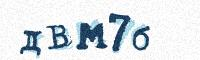

In [462]:
print(a.url)
BeautifulSoup(a.content)


In [139]:
params={
    'callback': 'jQuery34009249386478271078_1582708986749',
    'is[region_id][0]': '77',
    'is[last_name]': 'Иванов',
    'is[first_name]': 'Иван',
    'is[patronymic]': 'Иванович',
    'is[date]': '18.03.1985'
}

In [182]:
class Fss(ParserAbc):
    def normalize_html(self, html_data):
        print(html_data)
        return {}

In [183]:
fss = Fss(link)


In [184]:
fss.pipeline_one(params)

<Response [200]>


/Users/konstantinnabatcikov/Documents/AutoDrive/Notebooks/venv/lib/python3.8/site-packages/urllib3/connectionpool.py:997: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


{}

In [151]:
sud_link = "https://sudrf.ru/index.php?id=300&page=0&act=go_sp_search&searchtype=sp&court_subj=77&suds_subj=&num_d=&f_name=Набатчиков Константин Александрович&date_num_in=&date_num_out=&suds_vid=&spkatg=&suds_pip=&st_cat=&sud_pip=&"


In [154]:
sud_link.split('?')[1].split('&')

['id=300',
 'page=0',
 'act=go_sp_search',
 'searchtype=sp',
 'court_subj=77',
 'suds_subj=',
 'num_d=',
 'f_name=Набатчиков Константин Александрович',
 'date_num_in=',
 'date_num_out=',
 'suds_vid=',
 'spkatg=',
 'suds_pip=',
 'st_cat=',
 'sud_pip=',
 '']

In [261]:
a = requests.get(
    'https://sudrf.ru/index.php',
    headers={'User-Agent': random.choice(user_agents)},
    params={
        'id': '300',
        'page': '0',
        'act': 'go_sp_search',
        'searchtype': 'sp',
        'court_subj': '78',
        'f_name': 'Соколов Олег'
    },
    verify=False
)



/Users/konstantinnabatcikov/Documents/AutoDrive/Notebooks/venv/lib/python3.8/site-packages/urllib3/connectionpool.py:997: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [262]:
print(a.url)
BeautifulSoup(a.content)


https://sudrf.ru/index.php?id=300&page=0&act=go_sp_search&searchtype=sp&court_subj=78&f_name=%D0%A1%D0%BE%D0%BA%D0%BE%D0%BB%D0%BE%D0%B2+%D0%9E%D0%BB%D0%B5%D0%B3


<div class="style3" style="padding-left:1%; ">
<div align="center" class="style4">
<div id="line"></div>
<font size="5">Результаты поиска</font>
<div id="line"></div>
</div>
<div align="left" id="num1" style="padding-top: 0.2em; width:30%; font-size: 11px; color: #555; float: left;">
	Страницы : <b>1</b> | <a href="#" onclick="pages(2); return false;">2</a> | <a href="#" onclick="pages(3); return false;">3</a> <a href="#" onclick="pages(2); return false;" title="Следующая страница">&gt;</a>
<a href="#" onclick="pages(3); return false;" title="На последнюю страницу списка">&gt;&gt;</a> </div>
<div align="right" style="width:70%; font-size: 11px; color: #555; float: left;">
			Всего по запросу найдено - 65. На странице записи с 1 по 25		</div>
<br/>
<div id="num2">
<table border="0" cellpadding="3" cellspacing="0" id="tablcont" width="100%">
<tr align="center" id="head_num">
<td>Суд</td>
<td>Номер дела</td>
<td>Дата поступления</td>
<td>Информация по делу</td>
<td>Судья</td>
<td>Результа

In [165]:
"https://sudrf.ru/index.php?id=300&page=0&act=go_sp_search&searchtype=sp&court_subj=78&suds_subj=&num_d=&f_name=%D0%A1%D0%BE%D0%BA%D0%BE%D0%BB%D0%BE%D0%B2+%D0%9E%D0%BB%D0%B5%D0%B3&date_num_in=&date_num_out=&suds_vid=&spkatg=&suds_pip=&st_cat=&sud_pip=".split('?')[1].split('&')
        

['id=300',
 'page=0',
 'act=go_sp_search',
 'searchtype=sp',
 'court_subj=78',
 'suds_subj=',
 'num_d=',
 'f_name=%D0%A1%D0%BE%D0%BA%D0%BE%D0%BB%D0%BE%D0%B2+%D0%9E%D0%BB%D0%B5%D0%B3',
 'date_num_in=',
 'date_num_out=',
 'suds_vid=',
 'spkatg=',
 'suds_pip=',
 'st_cat=',
 'sud_pip=']

In [169]:
a.url.split('?')[1].split('&')[4]


'f_name=%D0%A1%D0%BE%D0%BA%D0%BE%D0%BB%D0%BE%D0%B2+%D0%9E%D0%BB%D0%B5%D0%B3+%D0%92%D0%B0%D0%BB%D0%B5%D1%80%D1%8C%D0%B5%D0%B2%D0%B8%D1%87'

In [232]:
params={
    'id': '300',
    'act': 'go_sp_search',
    'searchtype': 'sp',
    'court_subj': '78',
}

In [172]:
json.dumps(params)

'{"id": "300", "page": "1", "searchtype": "sp", "court_subj": "78", "f_name": "\\u0421\\u043e\\u043a\\u043e\\u043b\\u043e\\u0432 \\u041e\\u043b\\u0435\\u0433 \\u0412\\u0430\\u043b\\u0435\\u0440\\u044c\\u0435\\u0432\\u0438\\u0447"}'

In [203]:
from main import ParserAbc

In [231]:
class Sud(ParserAbc):
    def normalize_html(self, html_data):
        soup = BeautifulSoup(html_data.content)
        return soup

In [233]:
sud = Sud('https://sudrf.ru/index.php', params)

In [234]:
{**sud._params, **{'f_name': 'Соколов Олег Валерьевич', 'page': '1'}}

{'id': '300',
 'act': 'go_sp_search',
 'searchtype': 'sp',
 'court_subj': '78',
 'f_name': 'Соколов Олег Валерьевич',
 'page': '1'}

In [310]:
b = sud.pipeline_one({**sud._params, **{'f_name': 'Набатчиков Константин Александрович', 'page': '1', 'court_subj': '77'}})


/Users/konstantinnabatcikov/Documents/AutoDrive/Notebooks/venv/lib/python3.8/site-packages/urllib3/connectionpool.py:997: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


In [311]:
# Получить и нормальизовать таблицу
# Берет количество страниц и если не последняя еще раз делает запрос
data = {'header': [], 'data': []}
for row_i, row in enumerate(b.table.find_all('tr')):
#    print("Row: ", row_i)
    if row_i == 0:
        data['header'] = [x.text for x in row.find_all('td')]
    else:
        for col_i, column in enumerate(row.find_all('td')):
            data['data'].append({
                data['header'][col_i]: column.text
            })
#            print(column.text)
#    print('---')

AttributeError: 'NoneType' object has no attribute 'find_all'

In [309]:
data

{'header': ['Суд',
  'Номер дела',
  'Дата поступления',
  'Информация по делу',
  'Судья',
  'Результат слушания',
  'Судебныеакты'],
 'data': [{'Суд': 'Выборгский районный суд'},
  {'Номер дела': '1-132/2011 (1-1595/2010;) '},
  {'Дата поступления': '30.09.2010'},
  {'Информация по делу': '\xa0Котовский Денис Валерьевич - ст.126 ч.2 п.п.а,в,з; ст.163 ч.2 п.п.а,в УК РФ;Соколов Олег Дмитриевич - ст.33 ч.5-ст.126 ч.2 п.п.а,г,з; ст.33 ч.5-ст.163 ч.2 п.п.а,в УК РФ;Федоров Максим Сергеевич - ст.126 ч.2 п.п.а,в,д,з; ст.163 ч.2 п.п.а,в УК РФ'},
  {'Судья': '\xa0 Яковлев Сергей Юрьевич'},
  {'Результат слушания': '\xa0Вынесен ПРИГОВОР'},
  {'Судебныеакты': '\r\n\t\t\t\t\t\xa0\xa0\xa0\xa0\xa0\t\t\t\t'},
  {'Суд': 'Выборгский районный суд'},
  {'Номер дела': '1-159/2016 '},
  {'Дата поступления': '11.01.2016'},
  {'Информация по делу': '\xa0Соколов Олег Владиславович - ст.228 ч.2 УК РФ'},
  {'Судья': '\xa0Фатеенкова Валерия Алексеевна'},
  {'Результат слушания': '\xa0Вынесен ПРИГОВОР'},
  {'Суд

In [296]:
row

<tr align="center" id="head_num">
<td>Суд</td>
<td>Номер дела</td>
<td>Дата поступления</td>
<td>Информация по делу</td>
<td>Судья</td>
<td>Результат слушания</td>
<td>Судебные<br/>акты</td>
</tr>

In [265]:
# get all_pages
re.search(r"pages\(([\d]+)\)", b.find_all('a')[-1]['onclick']).group(1)


'3'

In [276]:
b

<div class="style3" style="padding-left:1%; ">
<div align="center" class="style4">
<div id="line"></div>
<font size="5">Результаты поиска</font>
<div id="line"></div>
</div>
<div align="left" id="num1" style="padding-top: 0.2em; width:30%; font-size: 11px; color: #555; float: left;">
	Страницы : <b>1</b> | <a href="#" onclick="pages(2); return false;">2</a> | <a href="#" onclick="pages(3); return false;">3</a> <a href="#" onclick="pages(2); return false;" title="Следующая страница">&gt;</a>
<a href="#" onclick="pages(3); return false;" title="На последнюю страницу списка">&gt;&gt;</a> </div>
<div align="right" style="width:70%; font-size: 11px; color: #555; float: left;">
			Всего по запросу найдено - 65. На странице записи с 1 по 25		</div>
<br/>
<div id="num2">
<table border="0" cellpadding="3" cellspacing="0" id="tablcont" width="100%">
<tr align="center" id="head_num">
<td>Суд</td>
<td>Номер дела</td>
<td>Дата поступления</td>
<td>Информация по делу</td>
<td>Судья</td>
<td>Результа

In [277]:
a

<Response [200]>

In [429]:
import json
import random
from abc import ABC, abstractmethod
from time import time

from bs4 import BeautifulSoup

import requests


# Абстрактные классы
class ExcelAbc(ABC):
    """ExcelAbc
    Абстрактный класс для
    записи и чтения данных из Excel

    Arguments:
        ABC {abc.ABCMeta} -- вспомогательный класс для создания интерфейсов
    """
    def __init__(self):
        """Init
        Инициализация класса
        """
        super().__init__()

    @abstractmethod
    def read_file(self, file_path):
        """Read file
        Считывает excel файл и приводит его в нормальный вид
        {
            'header': [..., {str}, ...],
            'data': [
                {
                    hader_item: value_item,
                    {str}: {str},
                    ...
                },
                ...
            ]
        }

        Arguments:
            file_path {str} -- путь до файла

        Returns:
            {dict} -- данные приведенные в нормалный вид
        """
        return {}

    @abstractmethod
    def write_file(self, file_path, data):
        """Write file
        Принимает данные в нормальном виде
        Записывает их в файл

        Arguments:
            file_path {str} -- путь до файла
            data {str} -- данные в нормальном виде

        Returns:
            {bool} -- статус
        """
        return False


# Абстрактный класс для Парсинга
class ParserAbc(ABC):
    """ParserAbc
    Абстрактный класс для парсинга данных

    Arguments:
        ABC {[type]} -- [description]
    """

    def __init__(self, link, params):
        # Open user-agent list
        with open('user_agents.json', 'r', encoding='utf8') as f:
            self.user_agents = json.load(f)
        # Add arguments
        self.link = link
        self.set_params(params)
        super().__init__()

    def set_params(self, params):
        self._params = params

    def get_random_user_agent(self):
        """Get random_user_agent
        Получить случайный user-agent

        Returns:
            {str} -- user-agent
        """
        return random.choice(self.user_agents)

    def make_query(self, *, params={}, verify=False):
        """Make query
        Делаем запрос к сайту

        Keyword Arguments:
            params {dict} -- get параметры (default: {{}})
            verify {bool} -- аргумент в requests (default: {False})

        Returns:
            {requests.models.Response} -- объект с результатом запроса
        """
        return requests.get(
            self.link,
            headers={'User-Agent': self.get_random_user_agent()},
            params=params,
            verify=verify
        )

    def verify_response(self, res):
        """Verify response
        Проверяет резальтат на валидность

        Arguments:
            {requests.models.Response} -- объект с результатом запроса

        Returns:
            {bool} -- Статус
        """
        return True if res.status_code == 200 else False

    @abstractmethod
    def normalize_html(self, html_data):
        """Normalize html
        На вход принимает html, арсит с него искомые данные
        и приводит их к нормальному виду
        {
            'header': [..., {str}, ...],
            'data': [
                {
                    hader_item: value_item,
                    {str}: {str},
                    ...
                },
                ...
            ]
        }

        Arguments:
            html_data {requests.models.Response} -- Res

        Returns:
            {dict} -- словарь с данными
        """
        return {}

    def pipeline_one(self, params):
        # Конвейер
        if self.verify_response(curr:=self.make_query(params={**params, **self._params})):  # noqa
            return self.normalize_html(curr)
        return None


# Классы для парсинга
class Fss(ParserAbc):
    def normalize_html(self, html_data):
        return {}


class Sud(ParserAbc):
    def normalize_html(self, html_data):
        self.data = {'header': [], 'data': []}
        soup = BeautifulSoup(html_data.content)
        if not soup.table:
            return {}
        for row_i, row in enumerate(soup.table.find_all('tr')):
            if row_i == 0:
                self.data['header'] = [x.text for x in row.find_all('td')]
            else:
                _data = {}
                for col_i, column in enumerate(row.find_all('td')):
                    _data[self.data['header'][col_i]] = column.text
                self.data['data'].append(_data)
        return self.data

# Классы для работы с Excel
class ExcelFss(ExcelAbc):
    pass


In [328]:
params={
    'id': '300',
    'act': 'go_sp_search',
    'searchtype': 'sp',
}
sud = Sud('https://sudrf.ru/index.php', params)


In [329]:
sud.pipeline_one({'f_name': 'Соколов Олег Валерьевич', 'page': '1', 'court_subj': '78',})

/Users/konstantinnabatcikov/Documents/AutoDrive/Notebooks/venv/lib/python3.8/site-packages/urllib3/connectionpool.py:997: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(


{'header': ['Суд',
  'Номер дела',
  'Дата поступления',
  'Информация по делу',
  'Судья',
  'Результат слушания',
  'Судебныеакты'],
 'data': [{'Суд': 'Петроградский районный суд'},
  {'Номер дела': '2-2951/2013 ~ М-2520/2013 '},
  {'Дата поступления': '19.06.2013'},
  {'Информация по делу': '\xa0КАТЕГОРИЯ: - к средствам массовой информацииИСТЕЦ(ЗАЯВИТЕЛЬ): Соколов Олег ВалерьевичОТВЕТЧИК: ЗАО " Комсомольская правда в СПБ "'},
  {'Судья': '\xa0Тарасова Ольга Станиславовна'},
  {'Результат слушания': '\xa0Иск (заявление, жалоба) УДОВЛЕТВОРЕН ЧАСТИЧНО'},
  {'Судебныеакты': '\r\n\t\t\t\t\t\xa0\xa0\xa0\xa0\xa0\t\t\t\t'},
  {'Суд': 'Октябрьский районный суд'},
  {'Номер дела': '2-114/2019 (2-3763/2018;) ~ М-3728/2018 '},
  {'Дата поступления': '17.07.2018'},
  {'Информация по делу': '\xa0КАТЕГОРИЯ: прочие (прочие исковые дела)ИСТЕЦ(ЗАЯВИТЕЛЬ): Понасенков Евгений НиколаевичОТВЕТЧИК: Соколов Олег Валерьевич'},
  {'Судья': '\xa0Пазюченко Ирина Жоржовна'},
  {'Результат слушания': '\xa0ОТКАЗА

In [334]:
data = pd.read_excel('test.xlsx')


In [339]:
data['Фамилия']
data['Имя']
data['Отчество']
data['Дата рождения']

0   1997-01-17
1   1956-02-13
2   1965-06-14
Name: Дата рождения, dtype: datetime64[ns]

In [467]:
class ExcelSud(ExcelAbc):
    data = {'header': [], 'data': []}
    def read_file(self, file_path):
        self.data = {'header': [], 'data': []}
        self.data['header'] = 'f_name'
        data = pd.read_excel(file_path)
        for i in range(len(data['Фамилия'])):
            self.data['data'].append({
                'f_name': f"{data['Фамилия'][i]} {data['Имя'][i]} {data['Отчество'][i]}"
            })
        return self.data
    
    def write_file(self, file_path, data):
        df1 = pd.DataFrame(
            {
                header: [x[header] for x in data['data']]
                for i, header in enumerate(data['header'])
            }
        )
        with pd.ExcelWriter(file_path) as writer:  
            df1.to_excel(writer, sheet_name='1')
        

In [485]:
def analize(file_path):
    # для работы с excel
    ex = ExcelSud()
    # default get параметры
    params={
        'id': '300',
        'act': 'go_sp_search',
        'searchtype': 'sp',
        'page': '1',
        'court_subj': '77',
    }
    # для работы с базой данных
    sud = Sud('https://sudrf.ru/index.php', params)
    for x in (curr:=ex.read_file(file_path))['data']:
        curr_table = sud.pipeline_one(x)
        if curr_table:
            ex.write_file(
                'data/'+str(time()).split('.')[0]+".xls",
                curr_table
            )


In [486]:
analize('test.xlsx')

/Users/konstantinnabatcikov/Documents/AutoDrive/Notebooks/venv/lib/python3.8/site-packages/urllib3/connectionpool.py:997: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/konstantinnabatcikov/Documents/AutoDrive/Notebooks/venv/lib/python3.8/site-packages/urllib3/connectionpool.py:997: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.warn(
/Users/konstantinnabatcikov/Documents/AutoDrive/Notebooks/venv/lib/python3.8/site-packages/urllib3/connectionpool.py:997: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  warnings.w

In [401]:
a = pd.DataFrame(['a', 'b'], ['c', 'd'])

In [404]:
pd.DataFrame({'col_1': ['a', 'b', 'c'], 'col_2': ['2', '3', '5']})

,col_1,col_2
0,a,2
1,b,3
2,c,5


In [439]:
curr_table = {'header': ['Суд', 'Номер дела', 'Дата поступления', 'Информация по делу', 'Судья', 'Результат слушания', 'Судебныеакты'], 'data': [{'Суд': 'Петроградский районный суд', 'Номер дела': '2-2951/2013 ~ М-2520/2013 ', 'Дата поступления': '19.06.2013', 'Информация по делу': '\xa0КАТЕГОРИЯ: - к средствам массовой информацииИСТЕЦ(ЗАЯВИТЕЛЬ): Соколов Олег ВалерьевичОТВЕТЧИК: ЗАО " Комсомольская правда в СПБ "', 'Судья': '\xa0Тарасова Ольга Станиславовна', 'Результат слушания': '\xa0Иск (заявление, жалоба) УДОВЛЕТВОРЕН ЧАСТИЧНО', 'Судебныеакты': '\r\n\t\t\t\t\t\xa0\xa0\xa0\xa0\xa0\t\t\t\t'}, {'Суд': 'Октябрьский районный суд', 'Номер дела': '2-114/2019 (2-3763/2018;) ~ М-3728/2018 ', 'Дата поступления': '17.07.2018', 'Информация по делу': '\xa0КАТЕГОРИЯ: прочие (прочие исковые дела)ИСТЕЦ(ЗАЯВИТЕЛЬ): Понасенков Евгений НиколаевичОТВЕТЧИК: Соколов Олег Валерьевич', 'Судья': '\xa0Пазюченко Ирина Жоржовна', 'Результат слушания': '\xa0ОТКАЗАНО в удовлетворении иска (заявлении, жалобы)', 'Судебныеакты': '\r\n\t\t\t\t\t\xa0\xa0\xa0\xa0\xa0\t\t\t\t'}]}


In [443]:
for x in curr_table['data']:
    for k in x:
        print(k, x[k])


Суд Петроградский районный суд
Номер дела 2-2951/2013 ~ М-2520/2013 
Дата поступления 19.06.2013
Информация по делу  КАТЕГОРИЯ: - к средствам массовой информацииИСТЕЦ(ЗАЯВИТЕЛЬ): Соколов Олег ВалерьевичОТВЕТЧИК: ЗАО " Комсомольская правда в СПБ "
Судья  Тарасова Ольга Станиславовна
Результат слушания  Иск (заявление, жалоба) УДОВЛЕТВОРЕН ЧАСТИЧНО
Судебныеакты 
					     				
Суд Октябрьский районный суд
Номер дела 2-114/2019 (2-3763/2018;) ~ М-3728/2018 
Дата поступления 17.07.2018
Информация по делу  КАТЕГОРИЯ: прочие (прочие исковые дела)ИСТЕЦ(ЗАЯВИТЕЛЬ): Понасенков Евгений НиколаевичОТВЕТЧИК: Соколов Олег Валерьевич
Судья  Пазюченко Ирина Жоржовна
Результат слушания  ОТКАЗАНО в удовлетворении иска (заявлении, жалобы)
Судебныеакты 
					     				


<td>
					     				</td>

In [456]:
row

<tr valign="top">
<td>Красносельский районный суд</td>
<td align="center" nowrap="" title="Для получения справки по делу, нажмите на номер дела"><a href="http://ksl.spb.sudrf.ru/modules.php?name=sud_delo&amp;name_op=case&amp;case_id=358316142&amp;case_uid=5ce5d1f3-c7fd-40fe-95e4-8057ec8093f7&amp;result=1&amp;new=&amp;delo_id=1540005&amp;srv_num=1" target="_blank">2-4728/2014 ~ М-3566/2014</a> </td>
<td align="center">08.07.2014</td>
<td> КАТЕГОРИЯ: прочие (прочие исковые дела)<br/><br/>ОТВЕТЧИК: Соколов Олег Геннадьевич</td>
<td> Веретин Д.И.</td>
<td> Иск (заявление, жалоба) УДОВЛЕТВОРЕН</td>
<td>
					     				</td>
</tr>

In [459]:
b

<div align="center" style="padding:40px;"><b>По вашему запросу ничего не найдено.<br/>Попробуйте уточнить условия поиска.</b></div>

In [463]:
b.find('b')

<b>По вашему запросу ничего не найдено.<br/>Попробуйте уточнить условия поиска.</b>

In [471]:
'data/'+str(time.time()).split('.')[0]

AttributeError: 'builtin_function_or_method' object has no attribute 'time'

In [481]:
time()

1582720847.6248808

In [484]:
curr_table

{'header': ['Суд',
  'Номер дела',
  'Дата поступления',
  'Информация по делу',
  'Судья',
  'Результат слушания',
  'Судебныеакты'],
 'data': [{'Суд': 'Петроградский районный суд',
   'Номер дела': '2-2951/2013 ~ М-2520/2013 ',
   'Дата поступления': '19.06.2013',
   'Информация по делу': '\xa0КАТЕГОРИЯ: - к средствам массовой информацииИСТЕЦ(ЗАЯВИТЕЛЬ): Соколов Олег ВалерьевичОТВЕТЧИК: ЗАО " Комсомольская правда в СПБ "',
   'Судья': '\xa0Тарасова Ольга Станиславовна',
   'Результат слушания': '\xa0Иск (заявление, жалоба) УДОВЛЕТВОРЕН ЧАСТИЧНО',
   'Судебныеакты': '\r\n\t\t\t\t\t\xa0\xa0\xa0\xa0\xa0\t\t\t\t'},
  {'Суд': 'Октябрьский районный суд',
   'Номер дела': '2-114/2019 (2-3763/2018;) ~ М-3728/2018 ',
   'Дата поступления': '17.07.2018',
   'Информация по делу': '\xa0КАТЕГОРИЯ: прочие (прочие исковые дела)ИСТЕЦ(ЗАЯВИТЕЛЬ): Понасенков Евгений НиколаевичОТВЕТЧИК: Соколов Олег Валерьевич',
   'Судья': '\xa0Пазюченко Ирина Жоржовна',
   'Результат слушания': '\xa0ОТКАЗАНО в удовле